# MFKZIZ004 : Atmospheric modelling
## Task 1

In this section the main aim is plot the changes in temperature with changes to the albedo and emissivity variables. Then that will be plotted to show the changes. 

#### Energy Balance Model (EBM1):

$S(1 - \alpha) = 4 \varepsilon \sigma T^4$

### The model rearranged:



$T = \left( \frac{S(1 - \alpha)}{4 \varepsilon \sigma} \right)^{\tfrac{1}{4}}$


#### Checking if the model works:

In [49]:
# S(1- alpha) = 4*epsilon*T^-4
# Below are the values that we need to make sure that the model works, they will be put into the model. 
S = 1372
alpha = 0.3
epsilon = 0.6
sigma = 5.67*10**-8

T_cubed = S*(1-alpha)/(4*epsilon*sigma)
T = T_cubed**(1/4)
print(T) # Kelvin
print(T-273.15) #Celsius

289.84409886355775
16.69409886355777


#### (a) Plotting Sensitivity to Albedo and Emissivity

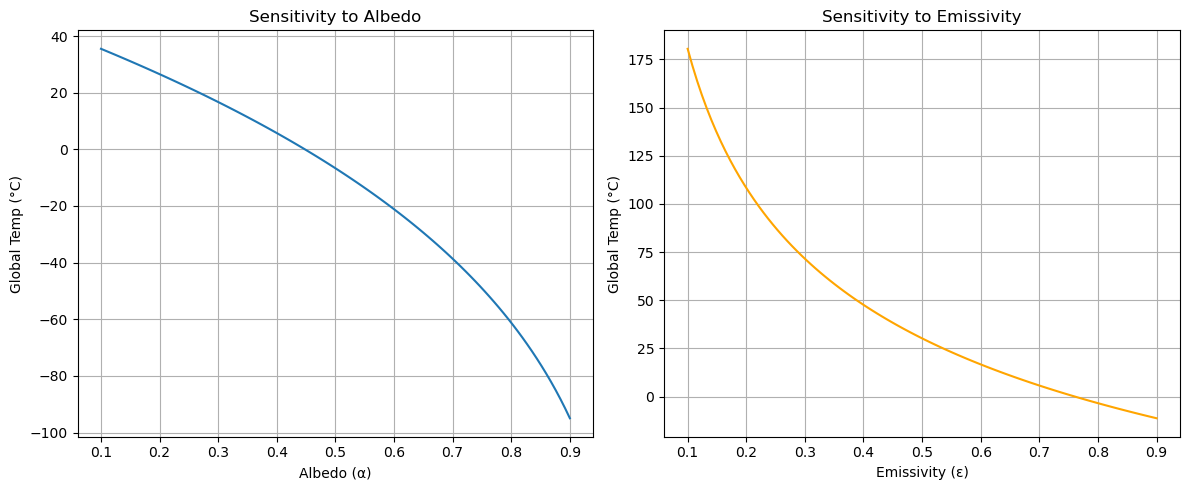

In [51]:
import numpy as np
import matplotlib.pyplot as plt

S = 1372
sigma = 5.67e-8

# This is a function used to compute temperature from alpha and epsilon
def compute_T(alpha, epsilon):
    T4 = S * (1 - alpha) / (4 * epsilon * sigma)
    return T4**(1/4)

# Part 1: Sensitivity to albedo
alphas = np.linspace(0.1, 0.9, 100) # These are the values we want to create our range from 
temps_alpha = compute_T(alphas, epsilon=0.6)

# 2. Sensitivity to emissivity
epsilons = np.linspace(0.1, 0.9, 100)
temps_epsilon = compute_T(alpha=0.3, epsilon=epsilons)

# Plotting the two different graphs 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(alphas, temps_alpha - 273.15)
plt.xlabel('Albedo (α)')
plt.ylabel('Global Temp (°C)')
plt.title('Sensitivity to Albedo')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epsilons, temps_epsilon - 273.15, color='orange')
plt.xlabel('Emissivity (ε)')
plt.ylabel('Global Temp (°C)')
plt.title('Sensitivity to Emissivity')
plt.grid(True)

plt.tight_layout()
plt.show()


#### Comment on the two graphs:

The graphs have shown that when the albedo effect is increased that leads to a increase in temperature. This may be due to the heat that will be reflected back. Additionally, it has been revealed that an increase in the emissivity leads to a decrease in temperature.


#### (b) Finding the % change to cool Earth to 0°C and the above plots will be used 


In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
S = 1372  # Solar constant
sigma = 5.67e-8  # Stefan-Boltzmann constant
alpha_ref = 0.3
epsilon_ref = 0.6

# Temperature function
def compute_T(alpha, epsilon):
    T4 = S * (1 - alpha) / (4 * epsilon * sigma)
    return T4**(1/4)

# Albedo range (holding ε constant)
alphas = np.linspace(0.1, 0.9, 500)
temps_alpha = compute_T(alphas, epsilon=epsilon_ref) - 273.15  # in °C

# Emissivity range (holding α constant)
epsilons = np.linspace(0.1, 0.9, 500)
temps_epsilon = compute_T(alpha=alpha_ref, epsilon=epsilons) - 273.15  # in °C

# Find alpha where temperature ≈ 0°C
idx_alpha = np.argmin(np.abs(temps_alpha - 0))
alpha_needed = alphas[idx_alpha]
alpha_change_pct = ((alpha_needed - alpha_ref) / alpha_ref) * 100

# Find epsilon where temperature ≈ 0°C
idx_epsilon = np.argmin(np.abs(temps_epsilon - 0))
epsilon_needed = epsilons[idx_epsilon]
epsilon_change_pct = ((epsilon_needed - epsilon_ref) / epsilon_ref) * 100

# Print results
print("TASK 1(b) RESULTS")
print(f"Required albedo for 0°C: {alpha_needed:.3f}")
print(f"→ Percentage change in albedo: {alpha_change_pct:.2f}%")
print(f"Required emissivity for 0°C: {epsilon_needed:.3f}")
print(f"→ Percentage change in emissivity: {epsilon_change_pct:.2f}%")


TASK 1(b) RESULTS
Required albedo for 0°C: 0.448
→ Percentage change in albedo: 49.30%
Required emissivity for 0°C: 0.761
→ Percentage change in emissivity: 26.75%


#### (c) Getting the 3°C warming as well as the offsetting

In [67]:
# Reference temperature
T_ref = compute_T(alpha=alpha_ref, epsilon=epsilon_ref)  # in K
T_target = T_ref + 3  # Increase by 3°C → 3 K

# Rearranged to find required ε for T_target
epsilon_new = S * (1 - alpha_ref) / (4 * sigma * T_target**4)
epsilon_pct_change = ((epsilon_new - epsilon_ref) / epsilon_ref) * 100

# Now: what alpha would cancel that warming (bring T back to T_ref)?
# Solve for alpha needed with same new ε but T = T_ref again
alpha_offset = 1 - (4 * epsilon_new * sigma * T_ref**4) / S
alpha_pct_change = ((alpha_offset - alpha_ref) / alpha_ref) * 100

# Print results
print("\nTASK 1(c) RESULTS")
print(f"Required ε to increase T by 3°C: {epsilon_new:.3f}")
print(f"→ Percentage change in ε: {epsilon_pct_change:.2f}%")
print(f"Required α to cancel warming: {alpha_offset:.3f}")
print(f"→ Percentage change in α: {alpha_pct_change:.2f}%")



TASK 1(c) RESULTS
Required ε to increase T by 3°C: 0.576
→ Percentage change in ε: -4.04%
Required α to cancel warming: 0.328
→ Percentage change in α: 9.42%


#### (d) What are the limitations of the Energy Balance Model for climate change studies


- The model is so simple that it treats earth as a single point, and this make it ignore the latitudinal and seasonal temperature variations.
- Things such as cloud formation (droplets) and various greenhouse gases are not included. 
- Albedo and emissivity constanta are treated as if they are constant, but they change with temperature, ice cover, etc.
-  It only shows the heat storage and transport processes.
- As a result, nonlinear feedbacks, such as ice-albedo feedback or water vapor effects are nor accounted for. 

Even though it has some limitations, it can be still used to understand basic climate changes. 

# Task 2



$C_p \frac{dT}{dt} = S(1 - \alpha) - 4 \epsilon \sigma T^4$

##### Where:

- $( C_p )$: Heat capacity of the climate system (W·year·m⁻²·K⁻¹)  
- $( S )$: Solar constant  
- $(alpha)$: Albedo  
- $( epsilon )$: Emissivity  
- $( sigma )$: Stefan-Boltzmann constant  
- $( T )$: Temperature (in Kelvin)


In [ ]:
#### (a) Plotting Temperature Evolution and Compare with Equilibrium Temperature

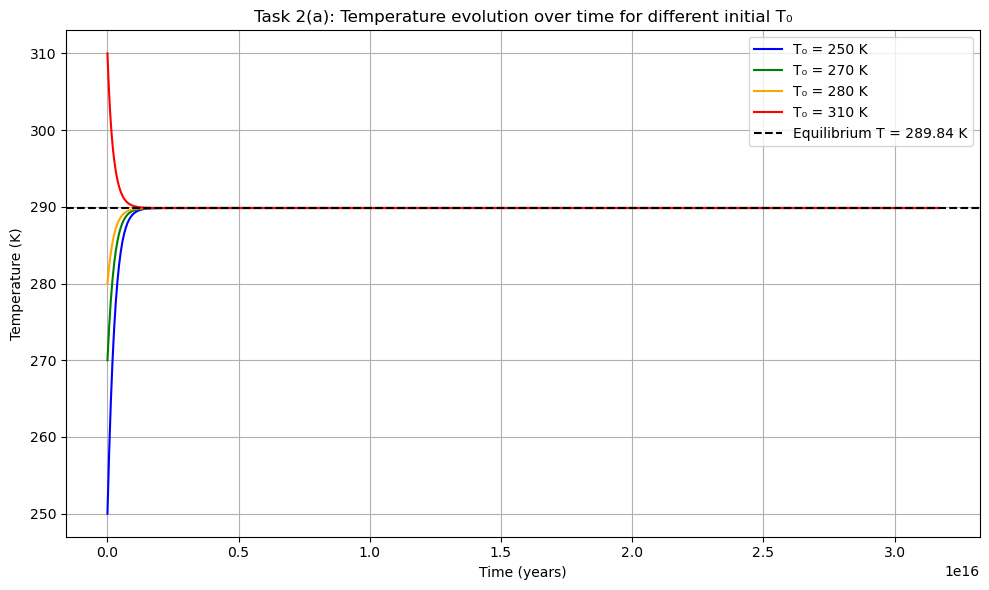

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Cp = 1.05e23  # J/K
S = 1372      # W/m^2
alpha = 0.3
sigma = 5.67e-8  # W/m^2/K^4
epsilon = 0.6
dt = 1.0e21   # seconds
Nstep = 1000  # Number of time steps

# Define time array in years
seconds_per_year = 3.154e7
time = np.arange(0, Nstep * dt, dt) / seconds_per_year

# --- dT/dt function ---
def dT_dt(T):
    incoming = S * (1 - alpha)
    outgoing = 4 * epsilon * sigma * T**4
    return (incoming - outgoing) / Cp

# --- Euler solver ---
def solve_temperature(T0):
    T = np.zeros_like(time)
    T[0] = T0
    for i in range(1, len(time)):
        T[i] = T[i-1] + dT_dt(T[i-1]) * dt
    return T

# --- Initial temperatures (K), include one below freezing (273.15 K) ---
T0_values = [250, 270, 280, 310]  # Kelvin
solutions = [solve_temperature(T0) for T0 in T0_values]

# --- Equilibrium temperature from Task 1 ---
T_eq = (S * (1 - alpha) / (4 * epsilon * sigma))**(1/4)

# --- Plotting ---
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'orange', 'red']
for T0, T_sol, color in zip(T0_values, solutions, colors):
    plt.plot(time, T_sol, label=f"T₀ = {T0} K", color=color)

plt.axhline(T_eq, color='black', linestyle='--', label=f'Equilibrium T = {T_eq:.2f} K')
plt.xlabel("Time (years)")
plt.ylabel("Temperature (K)")
plt.title("Task 2(a): Temperature evolution over time for different initial T₀")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### (b) Checking the effect of Changing Cp on Time to Equilibrium

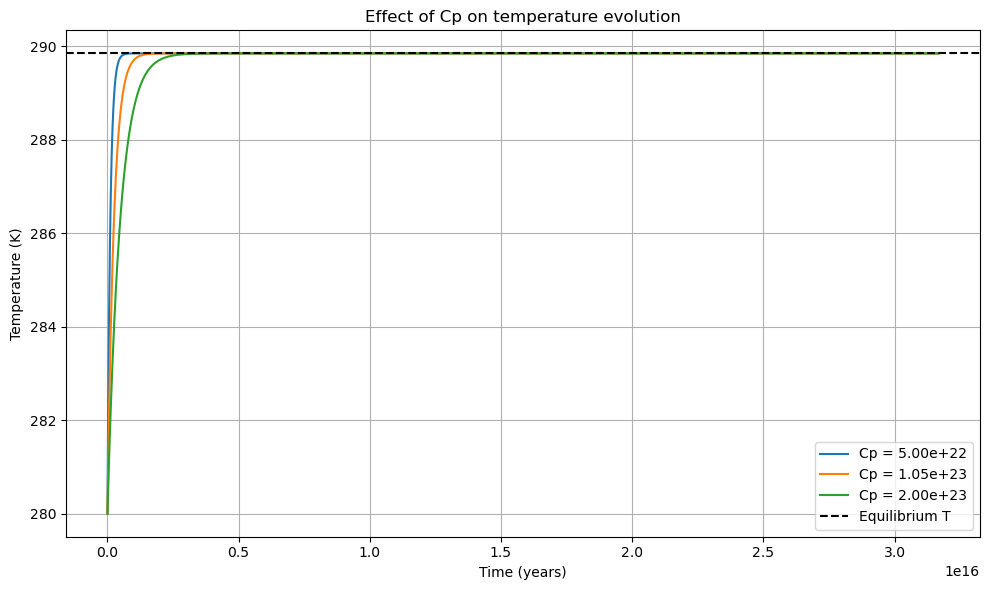

In [43]:
# Different Cp values
Cp_values = [0.5e23, 1.05e23, 2.0e23]
T0 = 280  # fixed starting temperature

def solve_temperature_Cp(T0, Cp):
    def dT_dt_Cp(T):
        incoming = S * (1 - alpha)
        outgoing = 4 * epsilon * sigma * T**4
        return (incoming - outgoing) / Cp
    T = np.zeros_like(time)
    T[0] = T0
    for i in range(1, len(time)):
        T[i] = T[i-1] + dT_dt_Cp(T[i-1]) * dt
    return T

# Solve for each Cp
solutions_Cp = [solve_temperature_Cp(T0, Cp) for Cp in Cp_values]

# Plot
plt.figure(figsize=(10, 6))
for Cp_val, sol in zip(Cp_values, solutions_Cp):
    plt.plot(time, sol, label=f"Cp = {Cp_val:.2e}")
plt.axhline(T_eq, color='black', linestyle='--', label='Equilibrium T')
plt.xlabel("Time (years)")
plt.ylabel("Temperature (K)")
plt.title("Effect of Cp on temperature evolution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#### (c) Adding Ice-Albedo Feedback and Compare

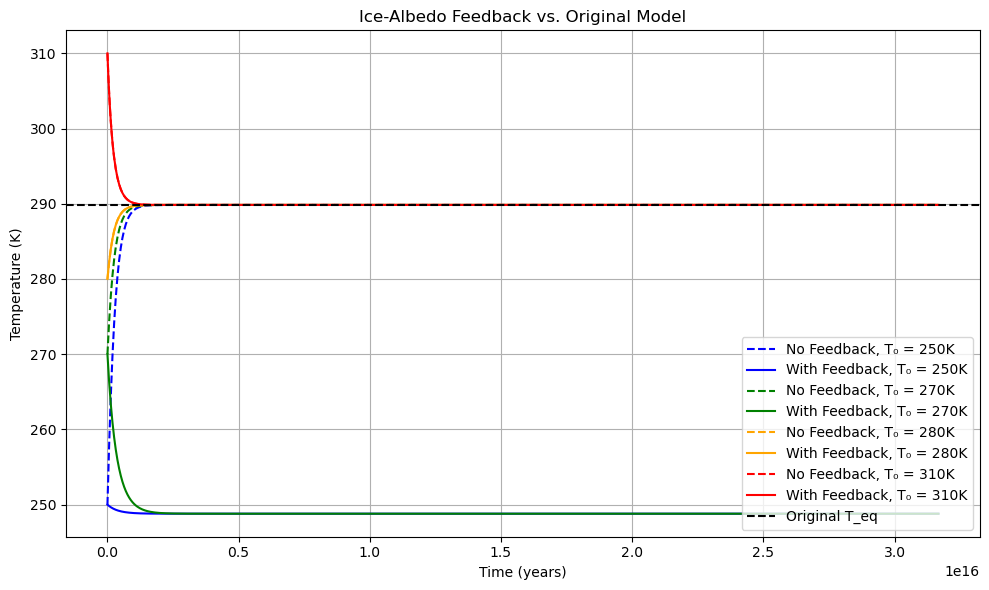

In [45]:
# Ice-albedo feedback model
def dT_dt_ice_feedback(T):
    alpha_dynamic = 0.62 if T < 273.15 else 0.3
    incoming = S * (1 - alpha_dynamic)
    outgoing = 4 * epsilon * sigma * T**4
    return (incoming - outgoing) / Cp

# Updated solver with ice-albedo feedback
def solve_temperature_feedback(T0):
    T = np.zeros_like(time)
    T[0] = T0
    for i in range(1, len(time)):
        T[i] = T[i-1] + dT_dt_ice_feedback(T[i-1]) * dt
    return T

# Solve with ice feedback
solutions_feedback = [solve_temperature_feedback(T0) for T0 in T0_values]

# Plot comparison with original
plt.figure(figsize=(10, 6))
for T0, T_orig, T_feed, color in zip(T0_values, solutions, solutions_feedback, colors):
    plt.plot(time, T_orig, linestyle='--', label=f"No Feedback, T₀ = {T0}K", color=color)
    plt.plot(time, T_feed, linestyle='-', label=f"With Feedback, T₀ = {T0}K", color=color)
plt.axhline(T_eq, color='black', linestyle='--', label='Original T_eq')
plt.xlabel("Time (years)")
plt.ylabel("Temperature (K)")
plt.title("Ice-Albedo Feedback vs. Original Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### (d) Climate Change and Tipping Points
Adding Ice has made the model non linear. It has been seen that temperature drecreases with increaing albedo below the freezing point. 

In [ ]:
(e) limitations: its just have global mean temperature. 

# Task 3

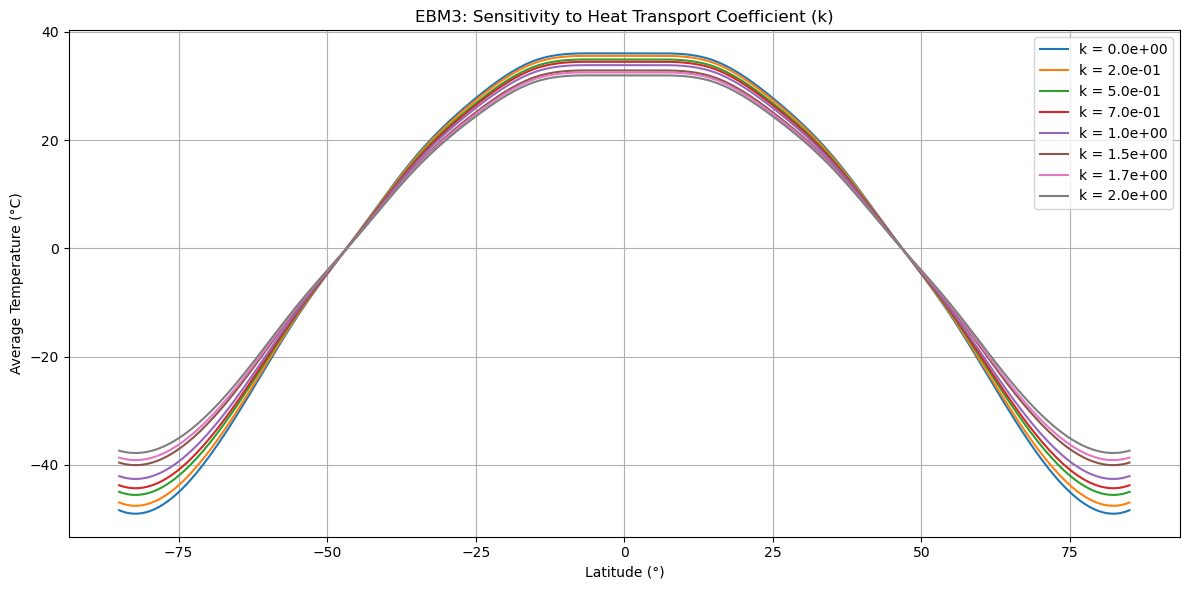

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# --- Constants from the Task ---
S = 1372  # Solar constant (W/m^2)
Cp = 1.05e23  # Heat capacity (J/K)
dt = 1.0e21  # Time step (s)
Nstep = 1000  # Number of time steps
epsilon = 0.6  # Emissivity
sigma = 5.67e-8  # Stefan-Boltzmann constant (W/m^2/K^4)
seconds_per_year = 3.154e7
time = np.arange(Nstep) * dt / seconds_per_year  # Convert time to years

# --- Zone and Latitude Data ---
latitudes = np.array([
    85, 75, 65, 55, 45, 35, 25, 15, 5,
    -5, -15, -25, -35, -45, -55, -65, -75, -85
])
zones = [
    (85, 0.500, 0.500), (75, 0.531, 0.500), (65, 0.624, 0.452),
    (55, 0.770, 0.407), (45, 0.892, 0.357), (35, 1.021, 0.309),
    (25, 1.120, 0.272), (15, 1.189, 0.248), (5, 1.219, 0.254),
    (-5, 1.219, 0.254), (-15, 1.189, 0.248), (-25, 1.120, 0.272),
    (-35, 1.021, 0.309), (-45, 0.892, 0.357), (-55, 0.770, 0.407),
    (-65, 0.624, 0.452), (-75, 0.531, 0.500), (-85, 0.500, 0.500)
]
Sfrac = np.array([z[1] for z in zones])
albedo = np.array([z[2] for z in zones])
T_init = np.zeros(len(zones)) + 273.15  # Initial temperature in Kelvin

# --- EBM3 Solver ---
def solve_EBM3(k):
    Tlat = np.zeros((Nstep, len(T_init)))
    Tlat[0] = T_init.copy()

    for t in range(1, Nstep):
        Tglobal = np.mean(Tlat[t-1])
        absorbed = S * Sfrac * (1 - albedo)
        emitted = 4 * epsilon * sigma * Tlat[t-1]**4
        transport = k * (Tlat[t-1] - Tglobal)
        dTdt = (absorbed - emitted - transport) / Cp
        Tlat[t] = Tlat[t-1] + dTdt * dt

        # Clamp temperatures to avoid numerical issues
        Tlat[t] = np.clip(Tlat[t], 150, 350)

    return Tlat

# --- Sensitivity Analysis for different values of k ---
k_values = [0, 0.2, 0.5, 0.7, 1,1.5, 1.7, 2.0]
results = {}

plt.figure(figsize=(12, 6))
for k in k_values:
    T_model = solve_EBM3(k)
    T_avg = np.mean(T_model, axis=0) - 273.15  # Convert to Celsius
    results[k] = T_avg

    # Spline smoothing
    lat_sorted, T_sorted = zip(*sorted(zip(latitudes, T_avg)))
    lat_new = np.linspace(min(lat_sorted), max(lat_sorted), 300)
    spl = make_interp_spline(lat_sorted, T_sorted, k=3)
    T_smooth = spl(lat_new)

    plt.plot(lat_new, T_smooth, label=f'k = {k:.1e}')

plt.xlabel("Latitude (°)")
plt.ylabel("Average Temperature (°C)")
plt.title("EBM3: Sensitivity to Heat Transport Coefficient (k)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


#### Comment on the graph: The sensitivity to Heat Transport Coefficient:
- As k increases, the temperature distribution becomes more uniform across latitudes. Lower values of k show greater temperature contrast between equator and poles.It seems that increase in K leads to temperature increase.



(b) Components of the Earth System Represented by Heat Transport:
The heat transport term (k*(Tlat - Tglobal)) represents the large-scale atmospheric and oceanic circulations that redistribute heat from equatorial to polar regions.

(c) Processes Involved in Heat Transport:
- Atmospheric circulation (e.g., Hadley cells, jet streams)
- Ocean currents (e.g., Gulf Stream, thermohaline circulation)

(d) Limitations of this Model:
- This model is so simple and it only shows latitidinal changes. The vertical component is nit accounted for.
- Other things such as water vapor and raind drops are not included on the model and they may impact the temperature.
- We have albedo and emmisivity as constants but it is not always the case because in real world secanarios that always changes.
- It helps understand basic temparature changes in a simple model. 

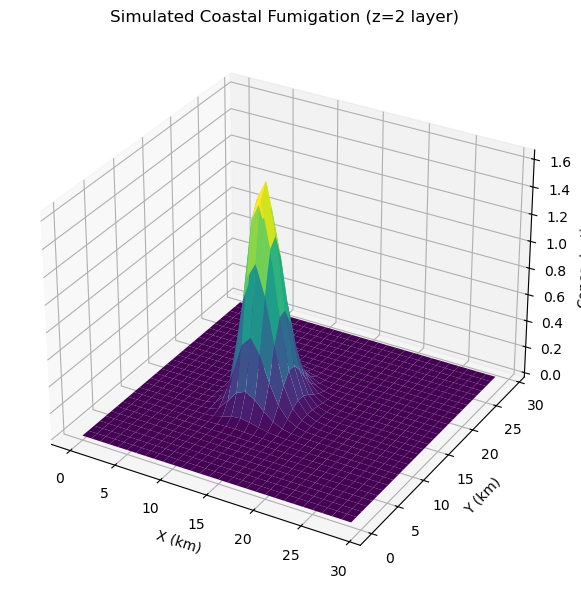

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Grid size
nx, ny, nz = 30, 30, 15
dx, dy, dz = 1.0, 1.0, 1.0  # km
dt = 1.0  # s
nt = 40   # number of time steps

# Wind velocities (km/s)
u, v, w = 0.1, 0.05, 0.02

# Diffusion coefficients (km^2/s)
Kx, Ky, Kz = 0.01, 0.01, 0.005

# Source term (units of concentration/time)
S = 0.0

# Create concentration grid
C = np.zeros((nx, ny, nz))
# Initial plume at center near surface
C[nx//3, ny//3, 2] = 100.0

def step(C):
    C_new = np.copy(C)
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            for k in range(1, nz-1):
                adv_x = -u * (C[i, j, k] - C[i-1, j, k]) / dx
                adv_y = -v * (C[i, j, k] - C[i, j-1, k]) / dy
                adv_z = -w * (C[i, j, k] - C[i, j, k-1]) / dz

                diff_x = Kx * (C[i+1, j, k] - 2*C[i, j, k] + C[i-1, j, k]) / dx**2
                diff_y = Ky * (C[i, j+1, k] - 2*C[i, j, k] + C[i, j-1, k]) / dy**2
                diff_z = Kz * (C[i, j, k+1] - 2*C[i, j, k] + C[i, j, k-1]) / dz**2

                C_new[i, j, k] += dt * (adv_x + adv_y + adv_z + diff_x + diff_y + diff_z + S)
    return C_new

# Simulate over time
for n in range(nt):
    C = step(C)

# Visualize the final 3D concentration field using a 3D surface slice
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0, nx)
y = np.arange(0, ny)
X, Y = np.meshgrid(x, y)
Z = C[:, :, 2]  # Slice at z = 2

surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title("Simulated Coastal Fumigation (z=2 layer)")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_zlabel("Concentration")
plt.tight_layout()
plt.show()
